## https://www.kaggle.com/paul92s/bitcoin-lstm-model-with-tweet-volume-and-sentiment/?select=btcSave2.csv#data
## https://towardsdatascience.com/technical-indicators-on-bitcoin-using-python-c392b4a33810
## https://medium.com/@DrPaulSimpson/lstm-model-predicting-bitcoin-with-tweet-volume-sentiment-bc3c490271a7
## https://towardsdatascience.com/using-deep-learning-ai-to-predict-the-stock-market-9399cf15a312
## https://towardsdatascience.com/predicting-bitcoin-prices-with-deep-learning-438bc3cf9a6f


In [7]:
import pandas as pd
import re 
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import os # accessing directory structure


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../Downloads/inputs/"))

#set seed
np.random.seed(12345)

['btcSave2.csv', 'cleanprep.csv']


In [11]:
notclean = pd.read_csv('../Downloads/inputs/cleanprep.csv', delimiter=',', error_bad_lines=False,engine = 'python',header = None)

In [12]:
notclean.head()

,0,1,2,3,4
0,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909
1,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000
2,2018-07-11 19:35:15.744769,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000
3,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000
4,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000


In [13]:
#-----------------Pre-processing -------------------#

notclean.columns =['dt', 'name','text','polarity','sensitivity']


In [14]:
notclean =notclean.drop(['name','text'], axis=1)

In [15]:
notclean.head()

,dt,polarity,sensitivity
0,2018-07-11 19:35:15.363270,0.007273,0.590909
1,2018-07-11 19:35:15.736769,0.000000,0.000000
2,2018-07-11 19:35:15.744769,0.625000,0.500000
3,2018-07-11 19:35:15.867339,0.000000,0.175000
4,2018-07-11 19:35:16.021448,0.333333,0.500000


In [16]:
notclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413001 entries, 0 to 1413000
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   dt           1413001 non-null  object 
 1   polarity     1413001 non-null  float64
 2   sensitivity  1413001 non-null  float64
dtypes: float64(2), object(1)
memory usage: 32.3+ MB


In [17]:
notclean['dt'] = pd.to_datetime(notclean['dt'])

In [18]:
notclean['DateTime'] = notclean['dt'].dt.floor('h')
notclean.head()

,dt,polarity,sensitivity,DateTime
0,2018-07-11 19:35:15.363270,0.007273,0.590909,2018-07-11 19:00:00
1,2018-07-11 19:35:15.736769,0.000000,0.000000,2018-07-11 19:00:00
2,2018-07-11 19:35:15.744769,0.625000,0.500000,2018-07-11 19:00:00
3,2018-07-11 19:35:15.867339,0.000000,0.175000,2018-07-11 19:00:00
4,2018-07-11 19:35:16.021448,0.333333,0.500000,2018-07-11 19:00:00


In [19]:
vdf = notclean.groupby(pd.Grouper(key='dt',freq='H')).size().reset_index(name='tweet_vol')

In [20]:
vdf.head()

,dt,tweet_vol
0,2018-07-11 19:00:00,1747
1,2018-07-11 20:00:00,4354
2,2018-07-11 21:00:00,4432
3,2018-07-11 22:00:00,3980
4,2018-07-11 23:00:00,3830


In [21]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dt         302 non-null    datetime64[ns]
 1   tweet_vol  302 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.8 KB


In [22]:
vdf.index = pd.to_datetime(vdf.index)
vdf=vdf.set_index('dt')

In [23]:
vdf.head()

,tweet_vol
dt,
2018-07-11 19:00:00,1747
2018-07-11 20:00:00,4354
2018-07-11 21:00:00,4432
2018-07-11 22:00:00,3980
2018-07-11 23:00:00,3830


In [24]:
notclean.index = pd.to_datetime(notclean.index)

In [26]:
vdf['tweet_vol'] =vdf['tweet_vol'].astype(float)


In [27]:
df = notclean.groupby('DateTime').agg(lambda x: x.mean())


In [28]:
df['Tweet_vol'] = vdf['tweet_vol']

In [29]:
df = df.drop(df.index[0])
df.head()

,dt,polarity,sensitivity,Tweet_vol
DateTime,,,,
2018-07-11 20:00:00,2018-07-11 20:27:49.510636288,0.102657,0.216148,4354.0
2018-07-11 21:00:00,2018-07-11 21:28:35.636368640,0.098004,0.218612,4432.0
2018-07-11 22:00:00,2018-07-11 22:27:44.646705152,0.096688,0.231342,3980.0
2018-07-11 23:00:00,2018-07-11 23:28:06.455850496,0.103997,0.217739,3830.0
2018-07-12 00:00:00,2018-07-12 00:28:47.975385344,0.094383,0.195256,3998.0


In [31]:
df=df.drop(['dt'],axis=1)

In [33]:
df.tail()

,polarity,sensitivity,Tweet_vol
DateTime,,,
2018-07-24 04:00:00,0.121358,0.236000,4475.0
2018-07-24 05:00:00,0.095163,0.216924,4808.0
2018-07-24 06:00:00,0.088992,0.220173,6036.0
2018-07-24 07:00:00,0.091439,0.198279,6047.0
2018-07-24 08:00:00,0.071268,0.218217,2444.0


In [35]:
btcDF = pd.read_csv('../Downloads/inputs/btcSave2.csv', error_bad_lines=False,engine = 'python')

In [36]:
btcDF['Timestamp'] = pd.to_datetime(btcDF['Timestamp'])
btcDF = btcDF.set_index(pd.DatetimeIndex(btcDF['Timestamp']))

In [37]:
btcDF.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,,
2018-07-10 01:00:00,2018-07-10 01:00:00,6666.75,6683.90,6635.59,6669.73,281.73,1875693.72,6657.70
2018-07-10 02:00:00,2018-07-10 02:00:00,6662.44,6674.60,6647.00,6647.00,174.10,1160103.29,6663.38
2018-07-10 03:00:00,2018-07-10 03:00:00,6652.52,6662.82,6621.99,6632.53,231.41,1536936.22,6641.70
2018-07-10 04:00:00,2018-07-10 04:00:00,6631.17,6655.48,6625.54,6635.92,120.38,799154.77,6638.52
2018-07-10 05:00:00,2018-07-10 05:00:00,6632.81,6651.06,6627.64,6640.57,94.00,624289.31,6641.32


In [38]:
btcDF = btcDF.drop(['Timestamp'], axis=1)

In [127]:
Final_df = pd.merge(df,btcDF, how='inner',left_index=True, right_index=True)

In [128]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2018-07-11 20:00:00 to 2018-07-24 01:00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   polarity           294 non-null    float64
 1   sensitivity        294 non-null    float64
 2   Tweet_vol          294 non-null    float64
 3   Open               294 non-null    float64
 4   High               294 non-null    float64
 5   Low                294 non-null    float64
 6   Close              294 non-null    float64
 7   Volume (BTC)       294 non-null    float64
 8   Volume (Currency)  294 non-null    float64
 9   Weighted Price     294 non-null    float64
dtypes: float64(10)
memory usage: 25.3 KB


In [165]:
#Technical Analysis indicators--simple moving average and relative strength index 
def SMA(df, periods=5):
    """
    Calculating the Simple Moving Average for the past n days
    
    **Values must be descending**
    """
    lst = []
        
    for i in range(len(df)):
        if i < periods:
            
            # Appending NaNs for instances unable to look back on
            lst.append(np.nan)
            
        else:
            # Calculating the SMA
            lst.append(round(np.mean(df[i:periods+i]), 2))
        
    return lst
  
  

    
def RSI(df, periods=5):
    """
    Calculates the Relative Strength Index
    
    **Values must be descending**
    """
    
    df = df.diff()
    
    lst = []
    
    for i in range(len(df)):
        if i < periods or i==len(df)-1:
            
            # Appending NaNs for instances unable to look back on
            lst.append(np.nan)
            
        else:
            
            # Calculating the Relative Strength Index          
            avg_gain = (sum([x for x in df[i:periods+i] if x >= 0]) / periods)
            avg_loss = (sum([abs(x) for x in df[i:periods+i] if x <= 0]) / periods)
            if avg_loss==0:
                lst.append(np.nan)
            else:
                rs = avg_gain / avg_loss

                rsi = 100 - (100 / (1 + rs))

                lst.append(round(rsi, 2))
    return lst

In [134]:
Final_df['RSI']=RSI(Final_df['Close'])
Final_df['SMA']=SMA(Final_df['Close'])
Final_df=Final_df[5:]

In [137]:
Final_df[Final_df['RSI']==np.nan]['RSI']=Final_df['RSI'].mean()

In [131]:
Final_df['RSI'][-1]=Final_df['RSI'].mean()

In [152]:
Final_df.tail()

,polarity,sensitivity,Tweet_vol,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,RSI,SMA
2018-07-23 21:00:00,0.107282,0.235636,5164.0,7746.99,7763.59,7690.16,7706.00,237.63,1836633.86,7729.06,40.99000,7724.25
2018-07-23 22:00:00,0.094493,0.271796,4646.0,7699.13,7759.99,7690.50,7750.09,63.31,489000.25,7724.30,61.02000,7728.81
2018-07-23 23:00:00,0.074246,0.231640,4455.0,7754.57,7777.00,7715.45,7722.32,280.46,2173424.81,7749.63,10.57000,7721.72
2018-07-24 00:00:00,0.080870,0.219367,3862.0,7722.95,7730.61,7690.17,7719.62,496.48,3830571.66,7715.44,57.14000,7721.42
2018-07-24 01:00:00,0.090717,0.212626,4620.0,7712.46,7727.70,7691.14,7723.22,163.99,1264085.79,7708.50,56.20371,7723.22


In [150]:
RSI=Final_df['RSI'].mean()
for i in range(len(Final_df)):
    if np.isnan(Final_df['RSI'][i]):
        Final_df['RSI'][i]=RSI
            

In [151]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2018-07-12 01:00:00 to 2018-07-24 01:00:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   polarity           289 non-null    float64
 1   sensitivity        289 non-null    float64
 2   Tweet_vol          289 non-null    float64
 3   Open               289 non-null    float64
 4   High               289 non-null    float64
 5   Low                289 non-null    float64
 6   Close              289 non-null    float64
 7   Volume (BTC)       289 non-null    float64
 8   Volume (Currency)  289 non-null    float64
 9   Weighted Price     289 non-null    float64
 10  RSI                289 non-null    float64
 11  SMA                289 non-null    float64
dtypes: float64(12)
memory usage: 29.4 KB


In [153]:
Final_df=Final_df.drop(['Weighted Price'],axis=1 )

In [154]:
Final_df.columns = ['Polarity', 'Sensitivity','Tweet_vol','Open','High','Low', 'Close_Price', 'Volume_BTC', 'Volume_Dollar','RSI','SMA']

In [155]:
Final_df = Final_df[['Polarity', 'Sensitivity','Tweet_vol','Open','High','Low', 'Volume_BTC', 'Volume_Dollar','RSI','SMA','Close_Price']]

In [156]:
Final_df.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,RSI,SMA,Close_Price
2018-07-12 01:00:00,0.100836,0.223076,3713.0,6379.13,6380.00,6347.72,141.50,900280.85,17.39,6338.58,6365.43
2018-07-12 02:00:00,0.111964,0.195043,3843.0,6365.24,6371.80,6324.48,141.30,896772.74,20.56,6331.41,6327.94
2018-07-12 03:00:00,0.105888,0.209939,3831.0,6328.40,6348.45,6302.18,162.37,1026431.72,9.25,6309.35,6326.98
2018-07-12 04:00:00,0.108117,0.208003,3743.0,6327.49,6343.22,6327.49,58.62,371327.65,7.30,6280.05,6339.50
2018-07-12 05:00:00,0.106667,0.217231,3480.0,6342.22,6344.57,6328.00,74.75,473450.28,11.33,6252.31,6333.05


In [157]:
#Exploratory Analysis

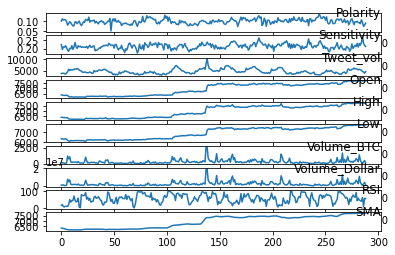

In [158]:
#--------------Analysis----------------------------#

values = Final_df.values
groups = [0,1,2,3,4,5,6,7,8,9]
i =1  
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1,i)
    pyplot.plot(values[:,group])
    pyplot.title(Final_df.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()

In [167]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2018-07-12 01:00:00 to 2018-07-24 01:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       289 non-null    float64
 1   Sensitivity    289 non-null    float64
 2   Tweet_vol      289 non-null    float64
 3   Open           289 non-null    float64
 4   High           289 non-null    float64
 5   Low            289 non-null    float64
 6   Volume_BTC     289 non-null    float64
 7   Volume_Dollar  289 non-null    float64
 8   RSI            289 non-null    float64
 9   SMA            289 non-null    float64
 10  Close_Price    289 non-null    float64
dtypes: float64(11)
memory usage: 27.1 KB


In [170]:
cor = Final_df.corr()
cor

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,RSI,SMA,Close_Price
Polarity,1.000000,0.381459,-0.168510,0.180218,0.177443,0.181319,-0.065524,-0.054873,0.091997,0.182745,0.179608
Sensitivity,0.381459,1.000000,0.055267,0.199598,0.205470,0.194945,0.097006,0.112674,-0.112532,0.192593,0.197988
Tweet_vol,-0.168510,0.055267,1.000000,0.230497,0.255776,0.227724,0.545067,0.548163,0.036990,0.249955,0.243962
Open,0.180218,0.199598,0.230497,1.000000,0.997080,0.998788,0.220714,0.279706,-0.026047,0.993262,0.997170
High,0.177443,0.205470,0.255776,0.997080,1.000000,0.996602,0.274806,0.332807,-0.010229,0.995143,0.998799
Low,0.181319,0.194945,0.227724,0.998788,0.996602,1.000000,0.206410,0.266221,-0.010171,0.994043,0.998033
Volume_BTC,-0.065524,0.097006,0.545067,0.220714,0.274806,0.206410,1.000000,0.996036,0.010656,0.247356,0.247541
Volume_Dollar,-0.054873,0.112674,0.548163,0.279706,0.332807,0.266221,0.996036,1.000000,0.005996,0.304795,0.305825
RSI,0.091997,-0.112532,0.036990,-0.026047,-0.010229,-0.010171,0.010656,0.005996,1.000000,0.048485,0.001715
SMA,0.182745,0.192593,0.249955,0.993262,0.995143,0.994043,0.247356,0.304795,0.048485,1.000000,0.996438


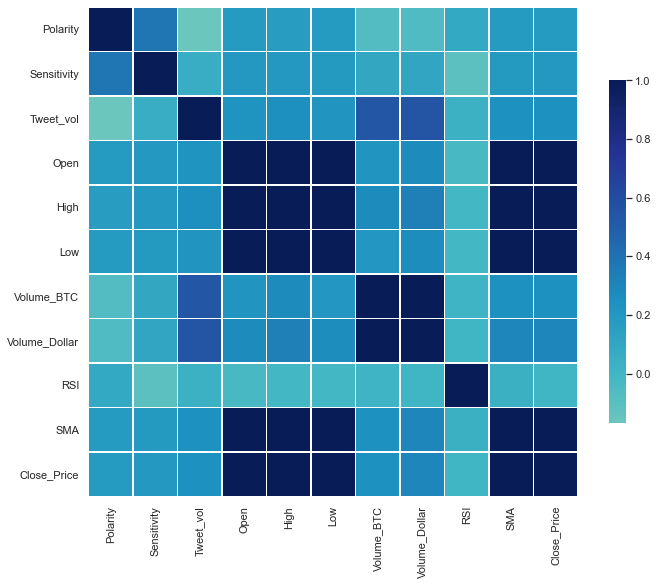

In [172]:
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

#cmap = sns.diverging_palette(220, 11, as_cmap=True)
ax =sns.heatmap(cor, cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

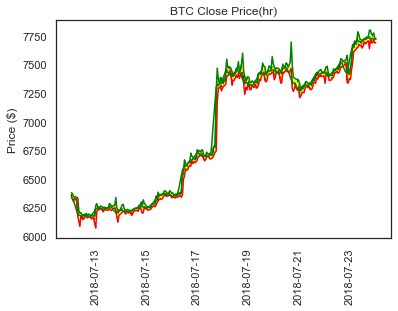

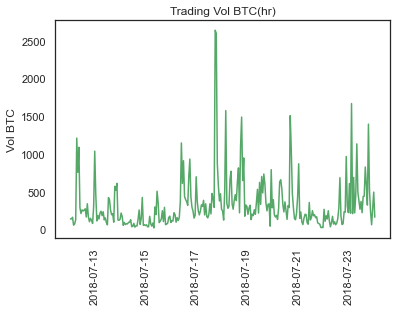

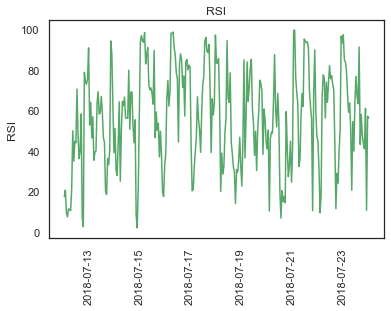

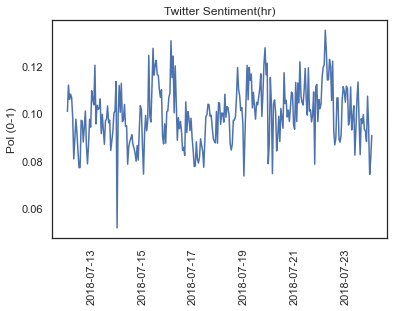

No handles with labels found to put in legend.


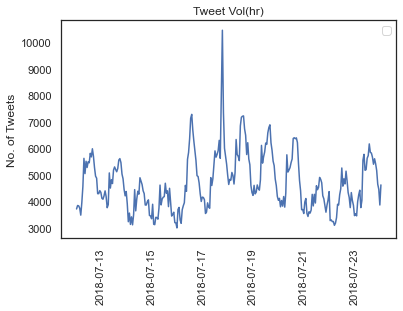

No handles with labels found to put in legend.


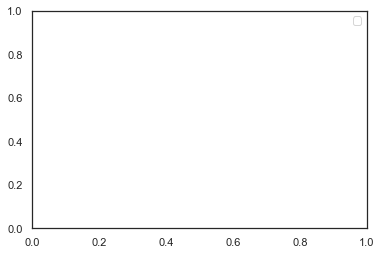

In [174]:
plt.plot(Final_df.index, Final_df['Close_Price'], 'black')
plt.plot(Final_df.index, Final_df['Open'], 'yellow')
plt.plot(Final_df.index, Final_df['Low'], 'red')
plt.plot(Final_df.index, Final_df['High'], 'green')
plt.plot(Final_df.index, Final_df['SMA'], 'green')
plt.title('BTC Close Price(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)');
plt.show();

plt.plot(Final_df.index, Final_df['Volume_BTC'], 'g')
plt.title('Trading Vol BTC(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Vol BTC');
plt.show();

plt.plot(Final_df.index, Final_df['RSI'], 'g')
plt.title('RSI')
plt.xticks(rotation='vertical')
plt.ylabel('RSI');
plt.show();

plt.plot(Final_df.index, Final_df['Polarity'], 'b')
plt.xticks(rotation='vertical')
plt.title('Twitter Sentiment(hr)')
plt.ylabel('Pol (0-1)');
plt.show();
plt.legend()

plt.plot(Final_df.index, Final_df['Tweet_vol'], 'b')
plt.xticks(rotation='vertical')
plt.title('Tweet Vol(hr)')
plt.ylabel('No. of Tweets');
plt.show();
plt.legend()

In [175]:
Final_df['time']=Final_df.index.to_series().apply(lambda x: x.strftime("%X"))

In [176]:
hour_df=Final_df

In [177]:
hour_df=hour_df.groupby('time').agg(lambda x: x.mean())

In [178]:
hour_df

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,RSI,SMA,Close_Price
time,,,,,,,,,,,
00:00:00,0.089958,0.213147,3974.583333,6976.966667,7006.453333,6945.485000,339.360000,2.347667e+06,58.377500,6992.156667,6982.315000
01:00:00,0.099596,0.211714,4016.615385,6935.140769,6963.533846,6894.772308,318.415385,2.243338e+06,52.452593,6946.392308,6933.794615
02:00:00,0.102724,0.204445,3824.083333,6868.211667,6889.440000,6842.588333,158.836667,1.105651e+06,57.580833,6886.329167,6870.695833
03:00:00,0.105586,0.214824,3791.666667,6870.573333,6909.675833,6855.316667,328.811667,2.385733e+06,53.928333,6887.941667,6888.139167
04:00:00,0.103095,0.208516,3822.916667,6887.420000,6911.649167,6872.603333,271.692500,1.949230e+06,51.134167,6887.487500,6890.985000
05:00:00,0.108032,0.215058,3904.166667,6891.468333,6911.175833,6869.017500,213.315000,1.524601e+06,53.978333,6886.956667,6890.451667
06:00:00,0.104412,0.210424,3760.250000,6889.327500,6907.070833,6868.484167,183.329167,1.281427e+06,56.271667,6889.985000,6891.371667
07:00:00,0.100942,0.209435,4056.000000,6891.645833,6908.654167,6858.290833,329.882500,2.263694e+06,56.991667,6893.228333,6878.757500
08:00:00,0.099380,0.210113,5095.583333,6878.635833,6903.660833,6851.435833,368.109167,2.616314e+06,60.749476,6901.955000,6885.867500


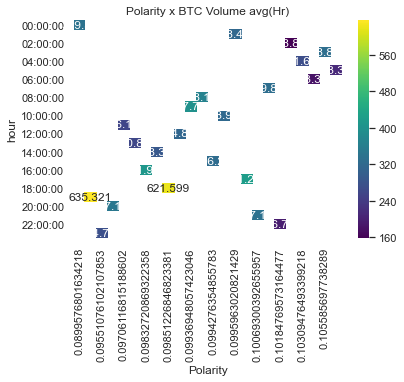

In [179]:
#sns Hourly Heatmap
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='hour', columns='Polarity', values='Volume_BTC')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('Polarity x BTC Volume avg(Hr)')
plt.show()



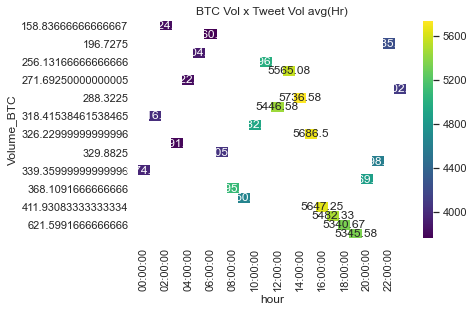

In [180]:
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='Volume_BTC', columns='hour', values='Tweet_vol')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('BTC Vol x Tweet Vol avg(Hr)')
plt.show()

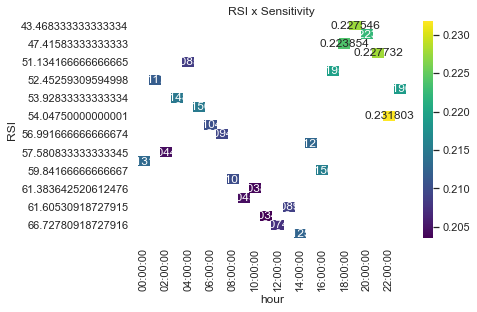

In [181]:
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='RSI', columns='hour', values='Sensitivity')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('RSI x Sensitivity')
plt.show()

In [182]:
#----------------End Analysis------------------------#

In [183]:
#---------------- LSTM Prep ------------------------#

In [184]:
df = Final_df

In [185]:
df = df.drop(['Open','High', 'Low', 'Volume_Dollar'], axis=1)
df.head()

,Polarity,Sensitivity,Tweet_vol,Volume_BTC,RSI,SMA,Close_Price,time
2018-07-12 01:00:00,0.100836,0.223076,3713.0,141.50,17.39,6338.58,6365.43,01:00:00
2018-07-12 02:00:00,0.111964,0.195043,3843.0,141.30,20.56,6331.41,6327.94,02:00:00
2018-07-12 03:00:00,0.105888,0.209939,3831.0,162.37,9.25,6309.35,6326.98,03:00:00
2018-07-12 04:00:00,0.108117,0.208003,3743.0,58.62,7.30,6280.05,6339.50,04:00:00
2018-07-12 05:00:00,0.106667,0.217231,3480.0,74.75,11.33,6252.31,6333.05,05:00:00


In [186]:
df = df[['Close_Price', 'Polarity', 'Sensitivity','Tweet_vol','Volume_BTC','RSI','SMA']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC,RSI,SMA
2018-07-12 01:00:00,6365.43,0.100836,0.223076,3713.0,141.50,17.39,6338.58
2018-07-12 02:00:00,6327.94,0.111964,0.195043,3843.0,141.30,20.56,6331.41
2018-07-12 03:00:00,6326.98,0.105888,0.209939,3831.0,162.37,9.25,6309.35
2018-07-12 04:00:00,6339.50,0.108117,0.208003,3743.0,58.62,7.30,6280.05
2018-07-12 05:00:00,6333.05,0.106667,0.217231,3480.0,74.75,11.33,6252.31


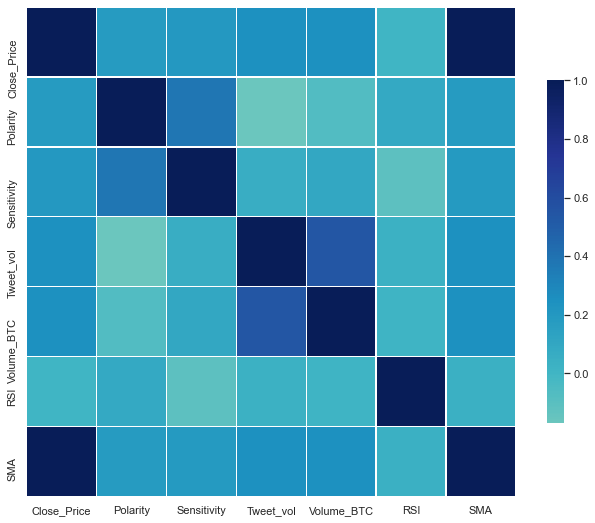

In [188]:
cor = df.corr()
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

#cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax =sns.heatmap(cor, cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

In [189]:
##LSTM MODEL
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

Using TensorFlow backend.


In [190]:
values = df.values
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df[['Close_Price', 'Polarity', 'Sensitivity','Tweet_vol','Volume_BTC','SMA','RSI']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC,SMA,RSI
2018-07-12 01:00:00,6365.43,0.100836,0.223076,3713.0,141.50,6338.58,17.39
2018-07-12 02:00:00,6327.94,0.111964,0.195043,3843.0,141.30,6331.41,20.56
2018-07-12 03:00:00,6326.98,0.105888,0.209939,3831.0,162.37,6309.35,9.25
2018-07-12 04:00:00,6339.50,0.108117,0.208003,3743.0,58.62,6280.05,7.30
2018-07-12 05:00:00,6333.05,0.106667,0.217231,3480.0,74.75,6252.31,11.33


In [191]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [193]:
n_hours = 3 #adding 3 hours lags creating number of observations 
n_features = 7 #Features in the dataset.
n_obs = n_hours*n_features

In [200]:
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var1(t-2),var2(t-2),var3(t-2),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
3,0.135117,0.589271,0.500135,0.095922,0.045637,0.108712,0.158793,0.111700,0.722717,0.212514,...,0.053607,0.090026,0.075562,0.118921,0.676582,0.345485,0.099946,0.013985,0.071296,0.055624
4,0.111700,0.722717,0.212514,0.113362,0.045561,0.104128,0.191207,0.111101,0.649855,0.365349,...,0.013985,0.071296,0.055624,0.114892,0.659195,0.440157,0.064663,0.020145,0.053563,0.096830
5,0.111101,0.649855,0.365349,0.111752,0.053607,0.090026,0.075562,0.118921,0.676582,0.345485,...,0.020145,0.053563,0.096830,0.112718,0.557567,0.327165,0.128253,0.041566,0.034744,0.091616
6,0.118921,0.676582,0.345485,0.099946,0.013985,0.071296,0.055624,0.114892,0.659195,0.440157,...,0.041566,0.034744,0.091616,0.042799,0.348710,0.169128,0.209686,0.454323,0.015003,0.087526
7,0.114892,0.659195,0.440157,0.064663,0.020145,0.053563,0.096830,0.112718,0.557567,0.327165,...,0.454323,0.015003,0.087526,0.019607,0.444672,0.106583,0.351892,0.281135,0.007946,0.197751


In [201]:
reframed.values

array([[0.13511724, 0.58927118, 0.50013485, ..., 0.01398516, 0.07129615,
        0.05562372],
       [0.11170033, 0.72271735, 0.21251356, ..., 0.0201452 , 0.05356321,
        0.09683027],
       [0.1111007 , 0.64985546, 0.36534897, ..., 0.04156594, 0.03474353,
        0.09161554],
       ...,
       [0.99631476, 0.43731438, 0.4703971 , ..., 0.09870574, 0.99289148,
        0.0890593 ],
       [0.97246062, 0.66657248, 0.62899504, ..., 0.18120367, 0.9926997 ,
        0.56523517],
       [1.        , 0.51321101, 1.        , ..., 0.05422591, 0.99385036,
        0.55566166]])

In [202]:
values = reframed.values
n_train_hours = 200
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train.shape

(200, 28)

In [262]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [269]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(200, 3, 7) (200,) (86, 3, 7) (86, 1)


In [205]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=6, validation_data=(test_X, test_y), verbose=2, shuffle=False,validation_split=0.2)
# plot history

Train on 200 samples, validate on 86 samples
Epoch 1/50
 - 1s - loss: 0.3313 - val_loss: 0.6681
Epoch 2/50
 - 0s - loss: 0.2692 - val_loss: 0.4935
Epoch 3/50
 - 0s - loss: 0.2192 - val_loss: 0.3257
Epoch 4/50
 - 0s - loss: 0.1786 - val_loss: 0.1946
Epoch 5/50
 - 0s - loss: 0.1313 - val_loss: 0.0996
Epoch 6/50
 - 0s - loss: 0.0992 - val_loss: 0.0805
Epoch 7/50
 - 0s - loss: 0.0742 - val_loss: 0.0750
Epoch 8/50
 - 0s - loss: 0.0666 - val_loss: 0.0694
Epoch 9/50
 - 0s - loss: 0.0620 - val_loss: 0.0652
Epoch 10/50
 - 0s - loss: 0.0587 - val_loss: 0.0617
Epoch 11/50
 - 0s - loss: 0.0549 - val_loss: 0.0594
Epoch 12/50
 - 0s - loss: 0.0514 - val_loss: 0.0568
Epoch 13/50
 - 0s - loss: 0.0487 - val_loss: 0.0542
Epoch 14/50
 - 0s - loss: 0.0461 - val_loss: 0.0519
Epoch 15/50
 - 0s - loss: 0.0436 - val_loss: 0.0515
Epoch 16/50
 - 0s - loss: 0.0411 - val_loss: 0.0486
Epoch 17/50
 - 0s - loss: 0.0391 - val_loss: 0.0461
Epoch 18/50
 - 0s - loss: 0.0372 - val_loss: 0.0429
Epoch 19/50
 - 0s - loss: 0.

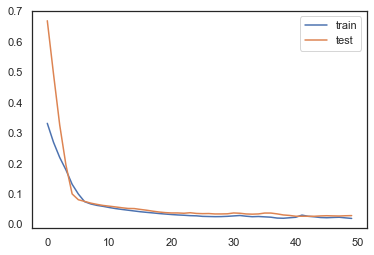

In [206]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [213]:
test_X

array([[0.82017264, 0.5647824 , 0.47179418, ..., 0.08103907, 0.83394702,
        0.6805726 ],
       [0.80738673, 0.43706442, 0.10833899, ..., 0.13165603, 0.83483558,
        0.54130879],
       [0.82174668, 0.60423057, 0.38423814, ..., 0.085408  , 0.83092334,
        0.18865031],
       ...,
       [0.99631476, 0.43731438, 0.4703971 , ..., 0.01577627, 0.9974238 ,
        0.60490798],
       [0.97246062, 0.66657248, 0.62899504, ..., 0.09870574, 0.99289148,
        0.0890593 ],
       [1.        , 0.51321101, 1.        , ..., 0.18120367, 0.9926997 ,
        0.56523517]])

In [270]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features,))

#yhat=yhat.reshape((yhat.shape[0]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = (mean_squared_error(inv_y, inv_yhat))
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test MSE: 3490.430
Test RMSE: 59.080


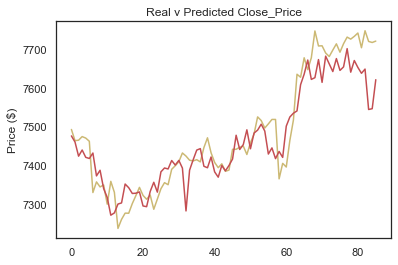

In [276]:
plt.title('Real v Predicted Close_Price')
plt.ylabel('Price ($)')
plt.plot(inv_y, label='Real',color='y')
plt.plot(inv_yhat, label='Predicted',color='r')

In [286]:
percent_errors=abs((inv_y-inv_yhat)*100/inv_y)

In [287]:
print('Average Percentage Error between the Actual close price of Bitcoins and the Predicted Price: ', percent_errors.mean(),'%')

Average Percentage Error between the Actual close price of Bitcoins and the Predicted Price:  0.6041605848313005 %
